# SML 301
## Session 3: Convergence

* sequences
* random variables
* convergence
* stochastic processes
* bias-variance

Remember to "Save Copy to Drive" to use your own cloud space.

In [144]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


# Sequences

In [145]:
this_seq = range(0, 10)

In [146]:
this_list = list(this_seq)

In [147]:
squares = [n**2 for n in this_seq]

# Random Variables

In [148]:
#normal distribution (via numpy)
# np.random.normal(mu, sigma, n)
mu, sigma = 5, 2
obs = np.random.normal(mu, sigma)
print(obs)

5.306528206689592


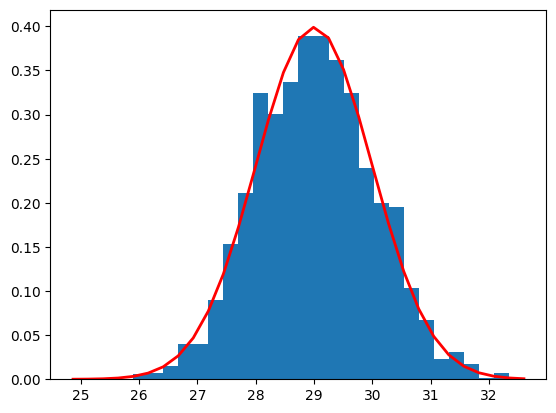

In [149]:
mu, sigma, n = 29, 1, 2025
dist_data = np.random.normal(mu, sigma, n)
count, bins, ignored = plt.hist(dist_data, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

# Exploration: Convergence

With these functions, we will explore how to solve equations of the form

$$f(x) = 0$$

using the Bisection and Newton Methods.

In [150]:
def bisection_method(f, a, b, tol):
  # tries to find a root of f between a and b (i.e. f(root) = 0)
  # Inputs: real numbers a, b; tolerance
  # Output: root

  # check if root is in the interval (i.e. Intermediate Value Theorem)
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("The endpoints do not contain a root")

  # initialization
    iter_num = 1

    while (b - a) > tol:
      c = (a + b) / 2

      print("iter_num: " + str(iter_num) + ", midpoint: " + str(c))

      if f(c) * f(a) < 0:
          b = c
      else:
          a = c

      iter_num += 1

    print("Root:", c)

In [151]:
f = lambda x: x**3 - 12*x**2  + 44*x - 48
#def f(x): 
#    x**3 - 12*x**2  + 44*x - 48

Try calling the `bisection_method` with different initial values for `a` and `b`, such as

* [0, 3]
* [3, 7]
* [5, 10]

In [152]:
bisection_method(f, 5, 8, 1e-6)

iter_num: 1, midpoint: 6.5
iter_num: 2, midpoint: 5.75
iter_num: 3, midpoint: 6.125
iter_num: 4, midpoint: 5.9375
iter_num: 5, midpoint: 6.03125
iter_num: 6, midpoint: 5.984375
iter_num: 7, midpoint: 6.0078125
iter_num: 8, midpoint: 5.99609375
iter_num: 9, midpoint: 6.001953125
iter_num: 10, midpoint: 5.9990234375
iter_num: 11, midpoint: 6.00048828125
iter_num: 12, midpoint: 5.999755859375
iter_num: 13, midpoint: 6.0001220703125
iter_num: 14, midpoint: 5.99993896484375
iter_num: 15, midpoint: 6.000030517578125
iter_num: 16, midpoint: 5.9999847412109375
iter_num: 17, midpoint: 6.000007629394531
iter_num: 18, midpoint: 5.999996185302734
iter_num: 19, midpoint: 6.000001907348633
iter_num: 20, midpoint: 5.999999046325684
iter_num: 21, midpoint: 6.000000476837158
iter_num: 22, midpoint: 5.999999761581421
Root: 5.999999761581421


In [153]:
f_prime = lambda x: 3*x**2 - 24*x + 44

In [154]:
def Newton_Method(f, f_prime, x_0, tol, max_iter):
  # tries to find a root of f between a and b (i.e. f(root) = 0)
  # Inputs: function f, derivative function f_prime,
  # initial guess x_0, tolerance tol, and maximum number of iterations
  # Output: root

  # initialization
    iter_num = 1
    x_n = x_0

    while (abs(f(x_n)) > tol) & (iter_num <= max_iter):
      print("iter_num: " + str(iter_num) + ", guess: " + str(x_n))
      f_x = f(x_n)
      f_prime_x = f_prime(x_n)

      x_n = x_n - f_x / f_prime_x
      iter_num += 1

    print("Root:", x_n)

Try calling `Newton_Method` with a few different guesses for the initial value $x_{0}$

In [155]:
Newton_Method(f, f_prime, 0, 1e-6, 1e2)

iter_num: 1, guess: 0
iter_num: 2, guess: 1.0909090909090908
iter_num: 3, guess: 1.6979064212449062
iter_num: 4, guess: 1.9493481420466034
iter_num: 5, guess: 1.9981830961138967
iter_num: 6, guess: 1.9999975293821097
Root: 1.9999999999954212


# Preview: Backpropagation

In this experiment, we will see if we can get some intuition about backpropagation in a relatively simple setting of linear regression.

In [156]:
# Generate some synthetic data with a linear relationship
np.random.seed(20250910) #tries to have same results for all users
x = np.linspace(-5, 5, num=10) #pick 100 evenly-spaced values for x between -5 and 5
y = 20*x + 25 + 5*np.random.normal(size=10) #preset relationship plus Gaussian white noise

Text(0, 0.5, 'y')

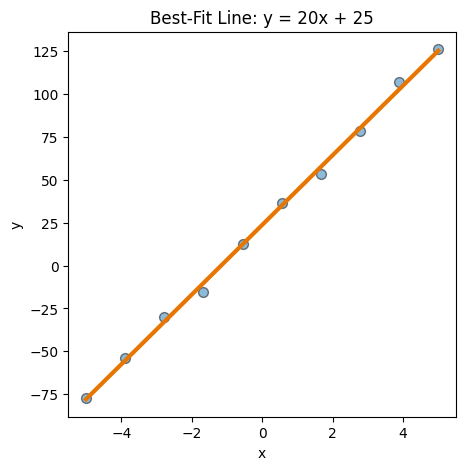

In [157]:
# Initialize layout
fig, ax = plt.subplots(figsize=(5, 5))

# Add scatterplot
ax.scatter(x, y, s=50, alpha=0.5, edgecolors="#000000")

# Add best-fit line
b, a = np.polyfit(x, y, deg = 1)
xseq = np.linspace(min(x), max(x), num = 301)
ax.plot(xseq, a + b*xseq, color = "#e77500", lw = 3)

# Label plot
ax.set_title("Best-Fit Line: y = 20x + 25")
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(0, 0.5, 'y')

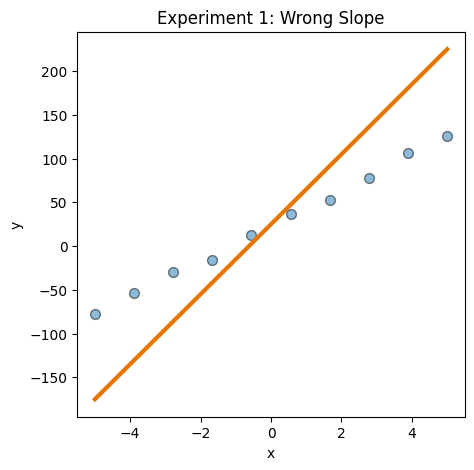

In [158]:
# Initialize layout
fig, ax = plt.subplots(figsize=(5, 5))

# Add scatterplot
ax.scatter(x, y, s=50, alpha=0.5, edgecolors="#000000")

# Add different line
xseq = np.linspace(min(x), max(x), num = 301)
ax.plot(xseq, 25 + 40*xseq, color = "#e77500", lw = 3)

# Label plot
ax.set_title("Experiment 1: Wrong Slope")
ax.set_xlabel("x")
ax.set_ylabel("y")

In [175]:
# initial conditions
beta_0 = 25
beta_1 = 40

# gradient
partial_beta_0 = -2*sum(y - beta_0 - beta_1*x)
partial_beta_1 = -2*sum((y - beta_0 - beta_1*x)*x)
print([partial_beta_0, partial_beta_1])

[np.float64(818.6018066160735), np.float64(36867.22009049051)]


Text(0, 0.5, 'y')

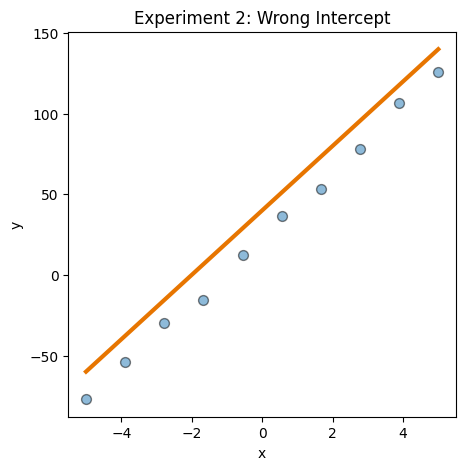

In [159]:
# Initialize layout
fig, ax = plt.subplots(figsize=(5, 5))

# Add scatterplot
ax.scatter(x, y, s=50, alpha=0.5, edgecolors="#000000")

# Add different line
xseq = np.linspace(min(x), max(x), num = 301)
ax.plot(xseq, 40 + 20*xseq, color = "#e77500", lw = 3)

# Label plot
ax.set_title("Experiment 2: Wrong Intercept")
ax.set_xlabel("x")
ax.set_ylabel("y")

In [176]:
# initial conditions
beta_0 = 40
beta_1 = 20

# gradient
partial_beta_0 = -2*sum(y - beta_0 - beta_1*x)
partial_beta_1 = -2*sum((y - beta_0 - beta_1*x)*x)
print([partial_beta_0, partial_beta_1])

[np.float64(3818.6018066160764), np.float64(2860.486083756498)]


# Stochastic Process Example

Suppose that we have a Princeton student whose behavior includes eating only three types of dinner:

$$S = \{\text{ramen}, \text{pizza}, \text{sushi}\}$$

with transition matrix

$$P = \left(\begin{array}{ccc}
0.2 & 0.4 & 0.4 \\
0.3 & 0.4 & 0.3 \\
0.2 & 0.2 & 0.6
\end{array}\right)$$


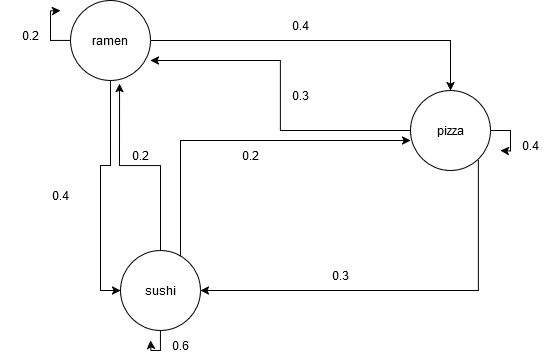

In [160]:
P = np.array([[0.2, 0.4, 0.4],
 [0.3, 0.4, 0.3],
  [0.2, 0.2, 0.6]])

Suppose that, on a Monday, the student's preferences are

$$x_0 = \left(\begin{array}{ccc} 0.5 & 0.25 & 0.25 \end{array}\right)$$

In [161]:
# initial distribution
x_0 = np.array([0.5, 0.25, 0.25])

In [162]:
# one day
x_0 @ P

array([0.225, 0.35 , 0.425])

In [163]:
# two days
x_0 @ P @ P

array([0.235, 0.315, 0.45 ])

In [164]:
# three days
x_0 @ np.linalg.matrix_power(P, 3)

array([0.2315, 0.31  , 0.4585])

# Bias Variance Trade-Off
## Code adapted from demo by Neri Van Otten

In [165]:
# Generate some synthetic data with a non-linear relationship (namely, third-degree polynomial)
np.random.seed(20250910) #tries to have same results for all users
x = np.linspace(-5, 5, num=100) #pick 100 evenly-spaced values for x between -5 and 5
y = x**3 + 2*x**2 + 3*x + 4 + np.random.normal(size=100) #cubic term plus Gaussian white noise

In [166]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20250910)

In [167]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80,)
(20,)
(80,)
(20,)


In [168]:
# Fit polynomial regression models with different degrees of polynomials
degrees = [1, 2, 3, 4, 5, 6, 7]
train_errors, test_errors = [], []
for degree in degrees:
    # Transform the features to polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    x_poly_train = poly_features.fit_transform(x_train.reshape(-1, 1))
    x_poly_test = poly_features.transform(x_test.reshape(-1, 1))

    # Fit the linear regression model to the polynomial features
    model = LinearRegression()
    model.fit(x_poly_train, y_train)

    # Evaluate the model on the training and testing data
    y_pred_train = model.predict(x_poly_train)
    y_pred_test = model.predict(x_poly_test)
    train_error = mean_squared_error(y_train, y_pred_train)
    test_error = mean_squared_error(y_test, y_pred_test)
    train_errors.append(train_error)
    test_errors.append(test_error)


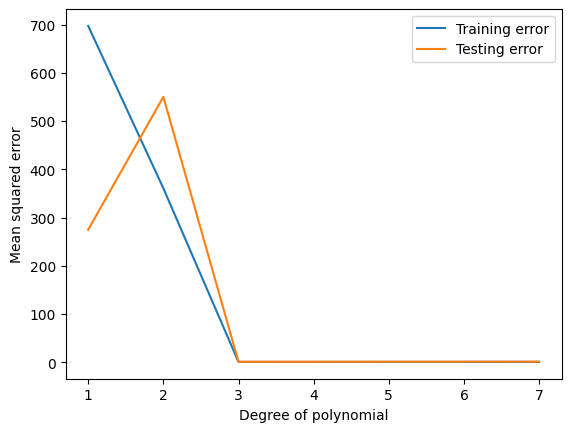

In [169]:
# Plot the training and testing errors as a function of the degree of polynomial
plt.plot(degrees, train_errors, label='Training error')
plt.plot(degrees, test_errors, label='Testing error')
plt.legend()
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean squared error')
plt.show()

In [170]:
print(test_errors)

[274.72359150058253, 550.0154038939443, 1.010496227670337, 1.0240023201159079, 1.1973979745604848, 1.2075562718818642, 1.2203574296864237]
